<a href="https://colab.research.google.com/github/sprhdr/Spiced-Project-Week1/blob/main/temp_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (15, 5)
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import stattools
from warnings import filterwarnings

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.ar_model import AutoReg

In [2]:
import warnings; 
warnings.simplefilter('ignore')

In [7]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 96.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825929 sha256=78bac2e85c62f3cdcf9881af09a5d1ab9d2c789ccaed72d0fe5c6404914295e9
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436403 sha256=51ac2edf90b0bc98a6097ab965d571749d76b526aec0a8ffc

In [9]:
from fbprophet import Prophet
import pandas as pd

In [67]:
temp = pd.read_csv('TG_STAID002759.txt', sep = ',' , header = 14)

In [68]:
temp = temp.drop(' SOUID', axis = 1)

In [69]:
temp['date'] = pd.to_datetime(temp['    DATE'], format='%Y%m%d')
temp

,DATE,TG,Q_TG,date
0,18760101,22,0,1876-01-01
1,18760102,25,0,1876-01-02
2,18760103,3,0,1876-01-03
3,18760104,-58,0,1876-01-04
4,18760105,-98,0,1876-01-05
...,...,...,...,...
53717,20230127,16,0,2023-01-27
53718,20230128,1,0,2023-01-28
53719,20230129,11,0,2023-01-29
53720,20230130,38,0,2023-01-30


In [70]:
temp.drop('    DATE', axis=1, inplace=True)

In [71]:
temp.columns = ['temperature', 'quality', 'date']

In [72]:
temp['temperature'] = temp['temperature'] * 0.1

In [73]:
temp

,temperature,quality,date
0,2.2,0,1876-01-01
1,2.5,0,1876-01-02
2,0.3,0,1876-01-03
3,-5.8,0,1876-01-04
4,-9.8,0,1876-01-05
...,...,...,...
53717,1.6,0,2023-01-27
53718,0.1,0,2023-01-28
53719,1.1,0,2023-01-29
53720,3.8,0,2023-01-30


In [74]:
df = df.rename(columns={'date': 'ds', 'temperature': 'y'})

In [75]:
df = df[df['ds'] >= '1970-01-01']

In [76]:
model = Prophet()

In [85]:
df

,y,quality,ds
34333,-12.8,0,1970-01-01
34334,-4.9,0,1970-01-02
34335,-1.4,0,1970-01-03
34336,-4.4,0,1970-01-04
34337,-3.0,0,1970-01-05
...,...,...,...
53717,1.6,0,2023-01-27
53718,0.1,0,2023-01-28
53719,1.1,0,2023-01-29
53720,3.8,0,2023-01-30


In [78]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
future = model.make_future_dataframe(periods=365)

In [80]:
forecast = model.predict(future)

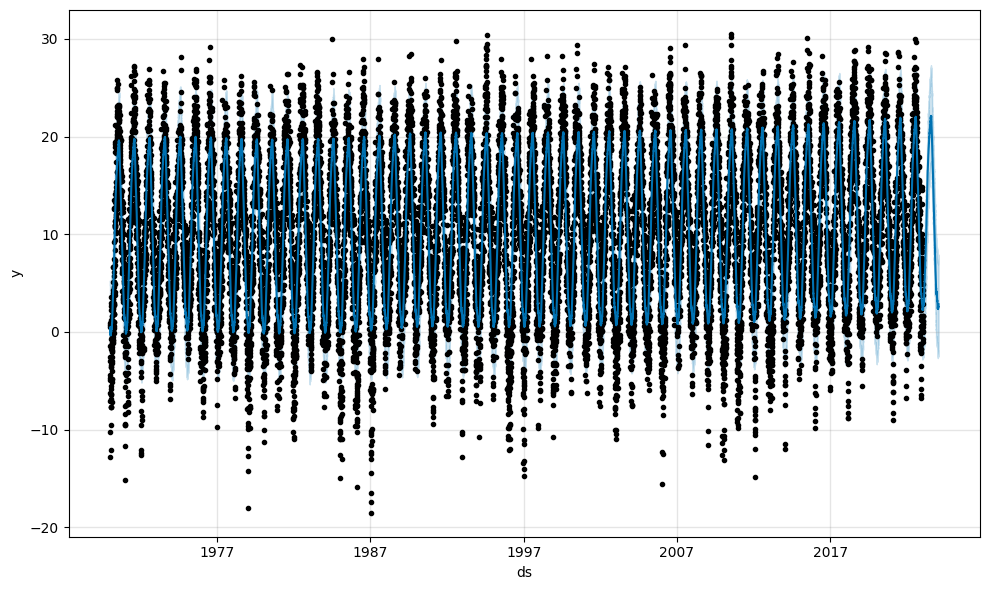

In [81]:
fig = model.plot(forecast)

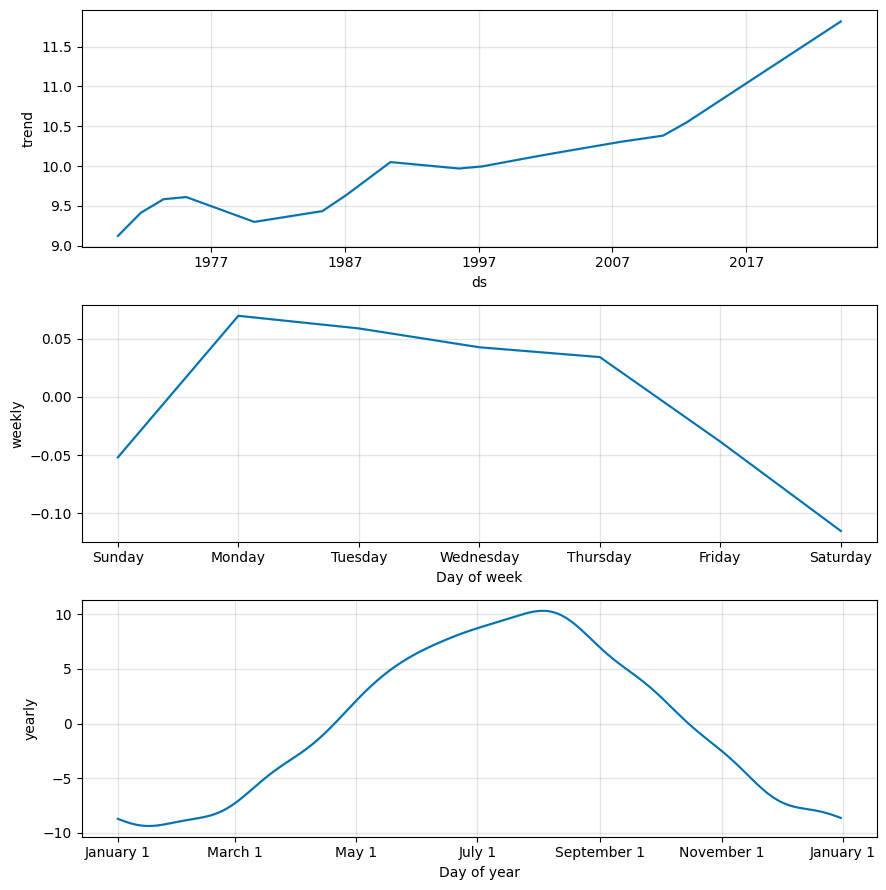

In [82]:
fig = model.plot_components(forecast)

In [83]:
forecast.to_csv('forecast.csv')

In [84]:
f = pd.read_csv('forecast.csv')
f

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,1970-01-01,9.123565,-4.500760,5.278512,9.123565,9.123565,-8.671397,-8.671397,-8.671397,0.034269,0.034269,0.034269,-8.705666,-8.705666,-8.705666,0.0,0.0,0.0,0.452168
1,1,1970-01-02,9.124031,-4.768449,5.131853,9.124031,9.124031,-8.812619,-8.812619,-8.812619,-0.038472,-0.038472,-0.038472,-8.774148,-8.774148,-8.774148,0.0,0.0,0.0,0.311412
2,2,1970-01-03,9.124498,-4.790824,5.112008,9.124498,9.124498,-8.957014,-8.957014,-8.957014,-0.115261,-0.115261,-0.115261,-8.841753,-8.841753,-8.841753,0.0,0.0,0.0,0.167484
3,3,1970-01-04,9.124965,-4.686118,4.743343,9.124965,9.124965,-8.959737,-8.959737,-8.959737,-0.051947,-0.051947,-0.051947,-8.907790,-8.907790,-8.907790,0.0,0.0,0.0,0.165228
4,4,1970-01-05,9.125432,-4.557648,4.899405,9.125432,9.125432,-8.901800,-8.901800,-8.901800,0.069773,0.069773,0.069773,-8.971573,-8.971573,-8.971573,0.0,0.0,0.0,0.223631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,19749,2024-01-27,11.814598,-2.416021,7.298474,11.806672,11.822022,-9.280160,-9.280160,-9.280160,-0.115261,-0.115261,-0.115261,-9.164899,-9.164899,-9.164899,0.0,0.0,0.0,2.534437
19750,19750,2024-01-28,11.814898,-2.004065,7.766658,11.806939,11.822469,-9.181060,-9.181060,-9.181060,-0.051947,-0.051947,-0.051947,-9.129113,-9.129113,-9.129113,0.0,0.0,0.0,2.633838
19751,19751,2024-01-29,11.815199,-1.975297,7.660669,11.807205,11.822842,-9.022931,-9.022931,-9.022931,0.069773,0.069773,0.069773,-9.092703,-9.092703,-9.092703,0.0,0.0,0.0,2.792268
19752,19752,2024-01-30,11.815500,-2.070863,7.388689,11.807472,11.823205,-8.997185,-8.997185,-8.997185,0.058925,0.058925,0.058925,-9.056110,-9.056110,-9.056110,0.0,0.0,0.0,2.818314


In [87]:
f['ds'] = pd.to_datetime(f['ds'])

In [93]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter the rows where ds is between 01.01.2023 and 28.02.2023
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-02-28')
forecast_filtered = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]

# Keep only the ds and yhat columns
forecast_filtered = forecast_filtered[['ds', 'yhat']]

In [ ]:
forecast_filtered

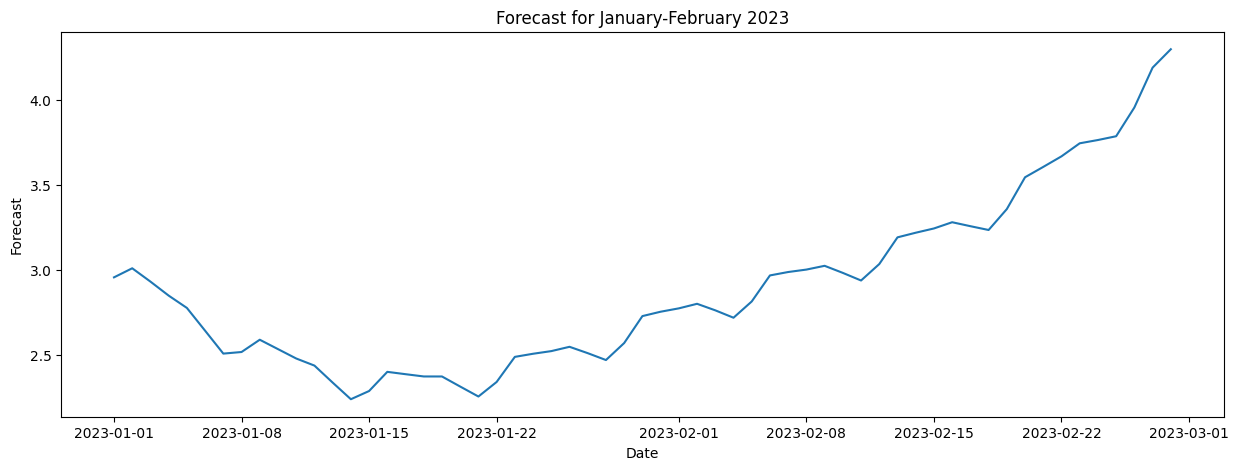

In [98]:
import matplotlib.pyplot as plt

# Assuming your forecast dataframe is called 'forecast'
forecast = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-02-28')][['ds', 'yhat']]

# Create the plot
plt.plot(forecast['ds'], forecast['yhat'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Forecast')
plt.title('Forecast for January-February 2023')

# Show the plot
plt.show()

In [101]:
f[f['ds'] == '2023-04-11']

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19458,19458,2023-04-11,11.727086,5.209412,14.702143,11.727086,11.727086,-1.598392,-1.598392,-1.598392,0.058925,0.058925,0.058925,-1.657316,-1.657316,-1.657316,0.0,0.0,0.0,10.128694
